# Prerequirments

In [1]:
import torch
import matplotlib.pyplot as plt

from torchvision.transforms import functional as F
from matplotlib.animation import FuncAnimation
from functools import partial
from IPython.display import HTML
from torch.optim import Adam

from IPython.display import clear_output
import time

In [2]:
def show_data(X, y, b, c, d):
    fig, axs = plt.subplots(1, 7, figsize=(1.5 * 7, 7))

    # Plot X
    axs[0].imshow(F.to_pil_image(X), cmap='hot')
    axs[0].set_title('X')
    axs[0].axis('off')

    # Plot b
    b_show = torch.ones(X.shape)
    b_show[:b.shape[0], int(X.shape[1] / 2)] = b.reshape(-1)
    axs[1].imshow(F.to_pil_image(b_show), cmap='hot', aspect=1)
    axs[1].set_title('b')
    axs[1].axis('off')

    # Plot X**2
    axs[2].imshow(F.to_pil_image(X**2), cmap='hot')
    axs[2].set_title('X**2')
    axs[2].axis('off')

    # Plot c
    c_show = torch.ones(X.shape)
    c_show[:c.shape[0], int(X.shape[1] / 2)] = c.reshape(-1)
    axs[3].imshow(F.to_pil_image(c_show), cmap='hot', aspect=1)
    axs[3].set_title('c')
    axs[3].axis('off')

    # Plot X**3
    axs[4].imshow(F.to_pil_image(X**3), cmap='hot')
    axs[4].set_title('X**3')
    axs[4].axis('off')

    # Plot d
    d_show = torch.ones(X.shape)
    d_show[:d.shape[0], int(X.shape[1] / 2)] = d.reshape(-1)
    axs[5].imshow(F.to_pil_image(d_show), cmap='hot', aspect=1)
    axs[5].set_title('d')
    axs[5].axis('off')


    # Plot y
    y_show = torch.ones(X.shape)
    y_show[:y.shape[0], int(X.shape[1] / 2)] = y.reshape(-1)
    axs[-1].imshow(F.to_pil_image(y_show), cmap='hot')
    axs[-1].set_title('y')
    axs[-1].axis('off')

    return fig, axs

In [3]:
def show_y(y, yhat):
    fig, axs = plt.subplots(1, 2, figsize=(1.5 * 2, 5))

    # Plot y
    axs[0].imshow(F.to_pil_image(y), cmap='hot')
    axs[0].set_title('y')
    axs[0].axis('off')

    # Plot yhat
    axs[1].imshow(F.to_pil_image(yhat), cmap='hot')
    axs[1].set_title('yhat')
    axs[1].axis('off')

    return fig, axs

# Difine Matrices

In [4]:
n = 40
p = 5
X = torch.rand(n, p) * 10

b = torch.rand(p, 1) * 10
c = torch.rand(p, 1) * 10
d = torch.rand(p, 1) * 10

y = X @ b + X**2 @ c + X**3 @ d

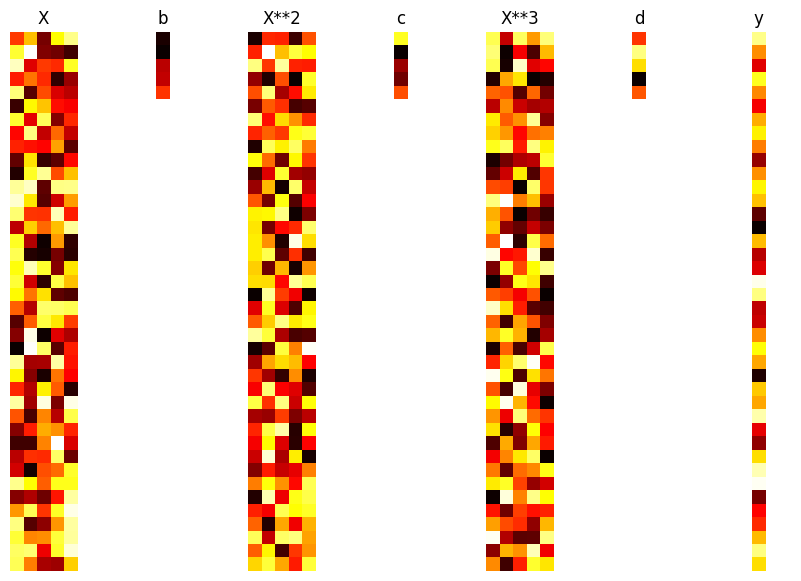

In [5]:
fig, axs = show_data(X, y, b, c, d)

fig.show()

In [6]:
X[:5, :5]

tensor([[2.4594, 0.6530, 4.1816, 5.7624, 6.9044],
        [3.8045, 2.0030, 9.2186, 8.1895, 4.0997],
        [0.9364, 5.3440, 4.4695, 7.4587, 8.8154],
        [6.4318, 7.5671, 6.4533, 0.0595, 6.2402],
        [1.8696, 7.1460, 0.4812, 2.3247, 3.2803]])

# Train Test Split

In [7]:
import random

In [12]:
indices = [i for i in range(X.shape[0])]

train_indices = random.sample(indices, 30)
test_indices = [i for i in indices if i not in train_indices]

In [13]:
X[[1, 5, 7]]

tensor([[3.8045, 2.0030, 9.2186, 8.1895, 4.0997],
        [1.0820, 2.7435, 0.6617, 5.4044, 8.3899],
        [3.3861, 1.8771, 9.3160, 7.5491, 3.2925]])

In [14]:
X[test_indices]

tensor([[2.4594, 0.6530, 4.1816, 5.7624, 6.9044],
        [3.8045, 2.0030, 9.2186, 8.1895, 4.0997],
        [1.0820, 2.7435, 0.6617, 5.4044, 8.3899],
        [7.8165, 9.3664, 0.8353, 4.2017, 6.4492],
        [0.8550, 5.4639, 3.4528, 7.9535, 0.4116],
        [2.7844, 1.2596, 1.0183, 3.6087, 5.0792],
        [4.7709, 6.9527, 5.8111, 5.2084, 7.7344],
        [3.7492, 6.5620, 7.7259, 8.1613, 0.1044],
        [0.9032, 5.2480, 1.9715, 6.1998, 8.0000],
        [4.2845, 2.4450, 9.4653, 7.8716, 0.1509]])

In [ ]:
y[test_indices]

tensor([[ 5235.7871],
        [ 2706.3083],
        [ 3500.0225],
        [ 4256.5122],
        [ 9047.3633],
        [ 7068.0591],
        [  486.8310],
        [ 2090.0071],
        [ 2423.4595],
        [10270.6357]])

In [15]:
X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]

# Pytorch Linear Regression

2 (1).svg

In [16]:
h = torch.nn.Linear(p, 1)

In [17]:
h(X_train)

tensor([[ 2.8950],
        [ 1.8092],
        [ 0.5930],
        [ 0.5485],
        [-0.1350],
        [ 1.0598],
        [ 2.1205],
        [ 0.7267],
        [ 0.8008],
        [ 1.6644],
        [ 1.9623],
        [ 0.9469],
        [ 1.7862],
        [ 2.6006],
        [ 0.7495],
        [ 1.6885],
        [ 2.9652],
        [ 2.3420],
        [ 2.8540],
        [ 0.8459],
        [ 2.7242],
        [ 1.3238],
        [ 3.8626],
        [ 1.7546],
        [ 3.2526],
        [ 1.1039],
        [ 1.3471],
        [ 2.2421],
        [ 2.3031],
        [ 0.6986]], grad_fn=<AddmmBackward0>)

In [18]:
optimizer = Adam(params=h.parameters(), lr=0.1)

loss_func = torch.nn.MSELoss()

In [19]:
epoch = 2000
for i in range(epoch):
    loss = loss_func(h(X_train), y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    # clear_output(wait=True)
    print(f'{loss.item():.2f}')

70939896.00
70898408.00
70856928.00
70815472.00
70774024.00
70732584.00
70691176.00
70649768.00
70608376.00
70567016.00
70525656.00
70484320.00
70443000.00
70401696.00
70360408.00
70319136.00
70277888.00
70236648.00
70195432.00
70154232.00
70113048.00
70071880.00
70030736.00
69989608.00
69948504.00
69907408.00
69866336.00
69825288.00
69784256.00
69743224.00
69702240.00
69661272.00
69620304.00
69579368.00
69538456.00
69497560.00
69456664.00
69415816.00
69374968.00
69334152.00
69293352.00
69252568.00
69211808.00
69171064.00
69130352.00
69089648.00
69048968.00
69008304.00
68967672.00
68927056.00
68886456.00
68845872.00
68805304.00
68764776.00
68724256.00
68683760.00
68643288.00
68602824.00
68562384.00
68521968.00
68481568.00
68441192.00
68400840.00
68360496.00
68320184.00
68279888.00
68239608.00
68199352.00
68159120.00
68118904.00
68078712.00
68038536.00
67998376.00
67958248.00
67918136.00
67878040.00
67837968.00
67797920.00
67757880.00
67717872.00
67677880.00
67637912.00
67597952.00
6755

In [20]:
linear_loss = loss_func(h(X_test), y_test)

linear_loss

tensor(10344368., grad_fn=<MseLossBackward0>)

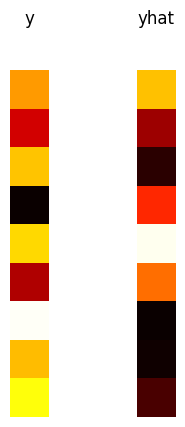

In [21]:
show_y(y_test, h(X_test));

# MLP

3.svg

In [22]:
class MLP(torch.nn.Module):

    def __init__(self, p):
        super().__init__()
        self.linear1 = torch.nn.Linear(p, 40)
        self.linear2 = torch.nn.Linear(40, 1)

    def forward(self, x):
        x = self.linear1(x)
        x = torch.nn.functional.relu(x)
        x = self.linear2(x)
        return x

In [23]:
mlp = MLP(p)

In [24]:
mlp(X_train)

tensor([[-0.3281],
        [-0.4210],
        [ 1.1945],
        [-0.3428],
        [-0.7626],
        [-0.8580],
        [-0.9984],
        [ 0.0433],
        [-1.2283],
        [-0.0544],
        [-0.7290],
        [-0.3693],
        [-0.7101],
        [-0.4805],
        [ 0.9806],
        [ 1.1344],
        [-0.5014],
        [ 0.5168],
        [-1.1408],
        [ 0.3703],
        [-0.9621],
        [-1.1714],
        [-1.0856],
        [-0.3960],
        [ 0.4277],
        [-0.3521],
        [-0.0800],
        [ 1.1168],
        [ 0.1497],
        [-1.6109]], grad_fn=<AddmmBackward0>)

In [25]:
for o in mlp.parameters():
    print('--------')
    print(o)

--------
Parameter containing:
tensor([[-0.0052,  0.1120,  0.2607,  0.1136,  0.3342],
        [ 0.1884,  0.4097, -0.2608,  0.4266,  0.4398],
        [ 0.0599, -0.3183,  0.2228,  0.3003,  0.1902],
        [-0.1475, -0.3041,  0.2364,  0.3193,  0.2084],
        [ 0.0266,  0.0017, -0.0539,  0.3529, -0.0225],
        [-0.3454,  0.2405, -0.1285, -0.3889,  0.0468],
        [ 0.1915,  0.1137,  0.3670,  0.4113,  0.0298],
        [-0.2694,  0.4148, -0.2951, -0.1419,  0.2938],
        [-0.3667, -0.4112, -0.3191,  0.4008, -0.0272],
        [-0.0075, -0.4074,  0.1205, -0.1845,  0.3736],
        [-0.0075, -0.3596, -0.2746,  0.2220,  0.1571],
        [ 0.2353,  0.3708,  0.0030, -0.1541, -0.2429],
        [-0.0276,  0.3680, -0.3017, -0.4319, -0.1103],
        [-0.3380,  0.2131,  0.4142, -0.0462, -0.3676],
        [-0.0132, -0.4305,  0.1105,  0.0110,  0.3373],
        [-0.3613,  0.1070,  0.1439, -0.0082,  0.3546],
        [ 0.1490,  0.0624,  0.0844, -0.0347,  0.3344],
        [-0.2669,  0.2127, -0.3703

In [26]:
optimizer = Adam(params=mlp.parameters(), lr=0.01)

In [27]:
loss_func = torch.nn.MSELoss()

In [28]:
epoch = 15000
for i in range(epoch):
    loss = loss_func(mlp(X_train), y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    # clear_output(wait=True)
    # print(f'epoch : {i}')
    print(f'{loss.item():.2f}')

Streaming output truncated to the last 5000 lines.
76.16
75.72
75.38
75.11
74.79
74.44
74.16
73.74
73.46
73.19
72.70
72.35
71.99
71.63
71.43
71.00
70.66
70.36
70.12
69.81
69.51
69.39
68.93
68.63
68.43
68.18
67.75
67.53
67.21
66.91
66.67
66.44
66.00
65.85
65.54
65.11
64.89
64.72
64.41
64.23
63.84
63.52
63.40
63.05
62.67
62.49
62.22
61.88
61.68
61.38
61.14
60.85
60.65
60.47
60.05
59.84
59.62
59.40
59.23
58.99
58.64
58.54
58.26
57.89
57.68
57.42
57.14
56.87
56.76
56.54
56.31
56.07
55.74
55.46
55.22
54.97
54.71
54.63
54.41
54.06
53.83
53.61
53.41
53.14
52.87
52.71
52.51
52.18
51.97
51.80
51.55
51.26
51.03
50.86
50.68
50.40
50.24
50.05
49.80
49.66
49.51
49.21
49.00
48.98
48.58
48.41
48.36
48.10
47.85
47.71
47.48
47.20
47.18
46.83
46.49
46.42
46.28
46.00
45.85
45.64
45.45
45.32
45.23
44.92
44.63
44.49
44.30
44.09
43.97
43.73
43.55
43.33
43.19
43.06
42.92
42.68
42.48
42.27
42.12
41.86
41.73
41.57
41.44
41.20
41.08
40.87
40.62
40.50
40.36
40.05
39.95
39.93
39.65
39.48
39.35
39.21
39.01
38.79
3

In [29]:
mlp_loss = loss_func(mlp(X_test), y_test)

mlp_loss

tensor(348404.5625, grad_fn=<MseLossBackward0>)

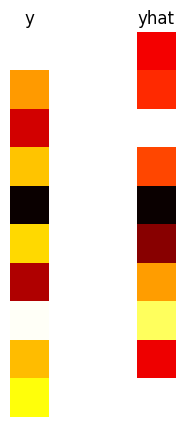

In [30]:
show_y(y_test, mlp(X_test));

In [31]:
print(linear_loss)
print(mlp_loss)

tensor(10344368., grad_fn=<MseLossBackward0>)
tensor(348404.5625, grad_fn=<MseLossBackward0>)
